# Trade Size Distributions and Befords Law

## Bored Ape Collection

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def first_sig_fig(number):
    """Returns the first significant digit of a provided number as string
    
    Parameters
    ----------
    number: The number whose first significant digit will be returned
    
    Raises
    ------
    TypeError: If the provided variable is not a number a TypeError will be raised
    """
    #Check that what is provided is actually a number
    if type(number) != int and type(number) != float and isinstance(number, numpy) == False:
        raise TypeError(f"{number} is not a number, it is of type {type(number)}")
    #Turn number into string so that it's iterable
    snumber = str(number)
    #Sentinel value to determine if we've hit the decimals yet.
    decimal_encountered = False
    for i in range(0,len(snumber)):
        if snumber[i].isdigit():
            temp = snumber[i]
            if snumber[i] == '0':
                pass
            else:
                return snumber[i]
        else:
            pass

In [4]:
def benford(array):
    """Takes in an array of prices as int or float and returns 
    the distribution of the first significant digit as a dict of each 
    digit and the respective count.
    
    Parameters
    ----------
    array: The numpy array to work with
    """
    c1, c2, c3, c4, c5, c6, c7, c8, c9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
    for value in array:
        if first_sig_fig(value) == '1':
            c1 += 1
        elif first_sig_fig(value) == '2':
            c2 += 1
        elif first_sig_fig(value) == '3':
            c3 += 1
        elif first_sig_fig(value) == '4':
            c4 += 1
        elif first_sig_fig(value) == '5':
            c5 += 1
        elif first_sig_fig(value) == '6':
            c6 += 1
        elif first_sig_fig(value) == '7':
            c7 += 1
        elif first_sig_fig(value) == '8':
            c8 += 1
        elif first_sig_fig(value) == '9':
            c9 += 1
        else:
            raise Exception(f"First sig fig is not a number 1-9")
    counts = {'1':c1, '2':c2, '3':c3, '4':c4, '5':c5, '6':c6, '7':c7, '8':c8, '9':c9}
    return counts

In [5]:
def clean_panda(dataframe):
    """Takes in a Panda dataframe read from an opensea csv, drops bad rows, 
    bundle data, non ETH transactions then deletes original panda from memory.
    
    Params
    ------
    panda - The panda to take in
    
    Returns
    -------
    cleaned_dataframe - The cleaned dataframe"""
    
    def main(dataframe):
        dataframe = drop_bad_rows(dataframe)
        dataframe = drop_bundle(dataframe)
        dataframe = drop_nETH(dataframe)
        dataframe.reset_index(inplace=True, drop=True)
        return dataframe
    
    def drop_bad_rows(dataframe):
        ret = dataframe.dropna(subset=['total_price'])
        return ret
    
    def drop_bundle(dataframe):
        return dataframe.iloc[:, 1:150]
    
    def drop_nETH(dataframe):
        #What happens if there are no non ETH indices?
        bad_indices = dataframe[(dataframe.payment_token_id != 1) & (dataframe.payment_token_id != 2)].index
        ret = dataframe.drop(bad_indices)
        return ret
    
    return main(dataframe)

In [6]:
def make_adjprice(dataframe):
        #Make an adj_price column to represent ETH price
        adj_price = dataframe.apply(lambda row: float(row.total_price) / (10**row.payment_token_decimals), axis = 1)
        return adj_price
cwd = os.getcwd()
#Load in initial panda
bored_ape_location = cwd + "/data/bored_ape.csv"
bored_ape = pd.read_csv(bored_ape_location, low_memory=False)

In [7]:
bored_ape = clean_panda(bored_ape)

In [8]:
bored_ape['adj_price'] = make_adjprice(bored_ape)

<AxesSubplot:>

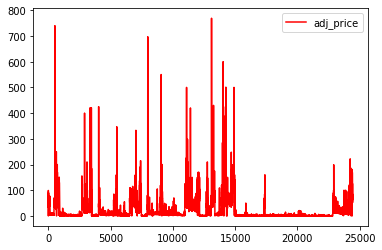

In [9]:
bored_ape.plot(y='adj_price', c='red')

In [10]:
bored_ape['adj_price'].tail(50)

24385     64.990000
24386     69.690000
24387     78.000000
24388     78.000000
24389     65.200000
24390     66.000000
24391     69.690000
24392     77.000000
24393     64.000000
24394    180.000000
24395     63.800000
24396     66.000000
24397      0.005432
24398     61.800000
24399     66.000000
24400     94.490000
24401     62.000000
24402     64.500000
24403     75.000000
24404     69.000000
24405     70.000000
24406     66.250000
24407     60.000000
24408     60.000000
24409    169.000000
24410     66.100000
24411    155.000000
24412     82.500000
24413     64.980000
24414     69.680000
24415     60.000000
24416    105.000000
24417     62.000000
24418     65.000000
24419     69.000000
24420     69.690000
24421     63.790000
24422     69.000000
24423     77.690000
24424     69.420000
24425     65.000000
24426     60.000000
24427     59.970000
24428     85.000000
24429     52.000000
24430     64.000000
24431     76.880000
24432     64.690000
24433     67.000000
24434    123.450000


In [88]:
def roundness_check(adj_prices):
    def last_sig_fig(number):
        """Returns an integer indicating how many places after the decimal the last significant digit is. 1 returned is considered to be 
        the tenths place, while -1 would indicate the ones place
        
        Params
        ------
        number - the number to find the last sigfig of
        
        Returns
        -------
        The integer representation of the last sigfig's place"""
        
        if type(number) != float and type(number) != int:
            raise ValueError(f'{number} is neither a float or int')
        
        #Convert to string to use indexing
        strnum = str(number)
        
        def calc_ones(strnum):
            last_sig_index = -9999
            #Strip decimal if we have one
            if '.' in strnum:
                strnum = strnum[0:strnum.rfind('.')]
            #Get length -1 for range
            length = len(strnum)
            for i in range(0, length):
                if strnum[i] != '0':
                    last_sig_index = i
            if last_sig_index != -9999:
                return -(len(strnum) - last_sig_index)
            else:
                #Edge case where we're processing 0.0
                return -1
            
        #0 and 1 can both be confused in boolean expressions, uses a decided 'null' value instead.
        last_sig_index = -9999
        if '.' in strnum:
            #rfinds gets the index of last .
            dec_loc = strnum.rfind('.')
            for i in range(dec_loc+1, (len(strnum))):
                #Zeros after the . will never be the last sigfig
                if strnum[i]!='0':
                    last_sig_index = i
            #We found sigfig past decimal
            if last_sig_index != -9999:
                #Return the last occurence, but first calculate the place:
                return last_sig_index-dec_loc
        #If there isnt a decimal, or we didn't find a sigfig past
        return calc_ones(strnum)
    
    counts = np.empty(0)
    for adj_price in adj_prices:
        #Find the last significant digit
        place = last_sig_fig(adj_price)
        counts = np.append(counts, place)
        """if (place < -4) | (place > 5) | (place == 0):
            raise Exception(f'Sigfig was: {place} and adj_price = {adj_price}' +
                            '. Considered outside of the realized bounds, and therefore has not been accounted for')"""
        """#Then increment the list
        if place == -4:
            thousands = thousands+1
        elif place == -3:
            hundreds = hundreds+1
        elif place == -2:
            tens = tens + 1
        elif place == -1:
            ones = ones + 1
        elif place == 1:
            tenths = tenths + 1
        elif place == 2:
            hundreths = hundreths + 1
        elif place == 3:
            thousandths = thousandths + 1
        elif place == 4:
            ten_thousandths = ten_thousandths + 1
        elif place == 5:
            hundred_thousandths = hundred_thousandths + 1
            
    return {'hundred_thousandths':hundred_thousandths, 'ten_thousandths':ten_thousandths, 'hundreths': hundreths, 'tenths': tenths, 
           'ones':ones, 'tens':tens, 'hundreds':hundreds, 'thousands':thousands}"""
    number, occurrences = np.unique(counts, return_counts=True)
    returndict = {}
    j = 0
    for i in number:
        returndict[f'{i}']=occurrences[j]
        j = j + 1
    return returndict

In [69]:
#np_counts = roundness_check(bored_ape['adj_price'])


In [73]:
def prep_pie(np_counts):
    labels = []
    counts = []
    for i in test:
        labels.append(i)
        counts.append(test[i])
    return labels, counts

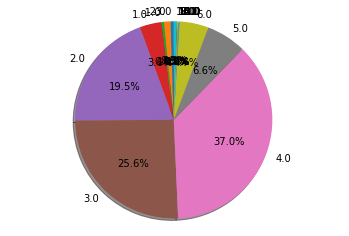

In [72]:
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

For chi squared test after this there is an 'expected value' that we need, need to look into how to calculate that value.

In [76]:
#Load in another panda
fomo_location = cwd + "/data/fomo_mofos.csv"
fomo = pd.read_csv(fomo_location, low_memory=False)

In [77]:
fomo = clean_panda(fomo)
fomo['adj_price'] = make_adjprice(fomo)

In [78]:
fomo['adj_price'].describe()

count    11285.000000
mean         0.583211
std          0.538061
min          0.000000
25%          0.420000
50%          0.489000
75%          0.650000
max         20.000000
Name: adj_price, dtype: float64

In [89]:
a = roundness_check(fomo['adj_price'])

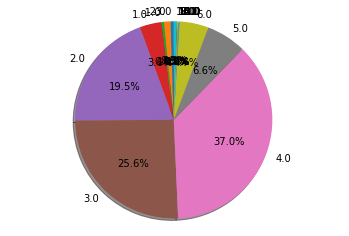

In [92]:
labels, counts = prep_pie(a)
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()